# Introduction

We have left to the end the study of time-dependent fields. We start by analysing the case of $\vec{E}$ and $\vec{B}$ fields uniform in space but varying in time.

In this notebook we will need two of the Maxwell equations in vacuum (in SI units)<a id="Ampere"></a>:
\begin{align}
\nabla\times\vec{B}-\frac{1}{c^2}\frac{\partial\vec{E}}{\partial t} &= \mu_0\vec{j} \tag{Ampere's law}\\
\nabla\times\vec{E}+\frac{\partial\vec{B}}{\partial t} &= 0 \tag{Faraday law}
\end{align}
and<a href="#rA">,</a> off course, we the force equation<a href="#rF">,</a>
$$ \vec{F} = q\left(\vec{E}+\vec{v}\times\vec{B}\right) \tag{Lorentz force}$$

We will use also the Gauss theorem,
$$ \int_S \nabla\times\vec{A}\cdot d\vec{S} = \oint_L \vec{A}\cdot d\vec{l}, $$
and also the concept of magnetic moment, $\mu$, which, for a closed loop of area $A$ and current $I$, has the value $\mu = IA$.

The subject of this notebook is covered in the bibliography in the following chapters:

* Chen<cite data-cite="chen1974"></cite>: chapter Two, section 2.5 and 2.6
* Nicholson<cite data-cite="nicholson1983"></cite>: chapter 2, section 2.5
* Bittencourt<cite data-cite="Bittencourt2004"></cite>: chapter 4
* Goldston<cite data-cite="Goldston1995"></cite>: chapter 4

The examples are prepared with the help of two scientific software packages, *Scipy*<cite data-cite="jones2001"></cite> and *IPython*<cite data-cite="PER-GRA:2007"></cite>.

# Time-dependent electric field, $\vec{E}(t)$

We start by considering the case in which only $\vec{E}$ varies in time. **What do we expect to happen?**

$\color{red}{Class\,discussion...}$

$\color{red}{...}$

* We should still have a $\vec{E}\times\vec{B}$ drift only that in this case $v_d$ changes with $\vec{E}(t)$. I.e. there is a force in $v_d$ direction. Together with the magnetic field, this force induces also a drift but in the direction perpendicular to the $\vec{E}\times\vec{B}$ drift and in the direction of $\vec{E}$ ! Contrarily to this drift where the direction does not depends on $q$, this new component of the drift depends on $q$ and the drift of positive and negative charges creates a current. We will call it *polarization drift*.

Let's try to find out the expression for this drift. To simplify we considere that $\vec{E}(t)$ varies in time with a sinusoidal function. Let's take $\vec{E}$ along the $x$ axis:
$$ \vec{E} = E_0 \exp(i\omega t)\vec{u}_x. $$

From the Lorentz force equation we have
\begin{align}
\ddot{v}_x &= -\omega_c^2 v_x \pm \omega_c \frac{\dot{E_x}(t)}{B} \\
\ddot{v}_y &= -\omega_c^2 v_y - \omega_c^2 \frac{E_x(t)}{B}
\end{align}
with $\dot{E_x} = i\omega E_x$.

Similarly to what we have done with the solution for an uniform electric field, we try to find the components of a "drift velocity" for this case, defining

\begin{align}
v_p &= \pm \frac{i\omega}{\omega_c}\frac{E_x}{B} \tag{+}\\
v_E &= - \frac{E_x}{B},
\end{align}
in order to write above equations as

\begin{align}
\ddot{v}_x &= -\omega_c^2 (v_x - v_p) \\
\ddot{v}_y &= -\omega_c^2 (v_y - v_E)
\end{align}

We can guess that the solution is a sum of a gyratory and a drift. As such we can try the following system:

\begin{align}
v_x &= v_\perp e^{i\omega_c t} + v_p \\
v_y &= \pm i v_\perp e^{i\omega_c t} + v_E
\end{align}

If we differenciate that system of functions, what we get is
\begin{align}
\ddot{v}_x &= -\omega_c^2 v_x + (\omega_c^2 - \omega^2)v_p \\
\ddot{v}_y &= -\omega_c^2 v_y + (\omega_c^2 - \omega^2)v_E,
\end{align}

which is not the correct solution **unless** $\omega \ll \omega_c$, i.e. the field $\vec{E}$ varies slowly in comparison with the cyclotronic movement.

We can generalize the equation (+) for an arbitrary variation of $\vec{E}$ and write
$$ \vec{v}_p = \pm \frac{1}{\omega_c B}\frac{d\vec{E}}{dt} $$

**Note 1**: The $v_E$ component is the usual $\vec{E}\times\vec{B}$ drift, with the difference that now (because of $E_x(t)$ it oscillates with a frequency $\omega$.

**Note 2**: The $x$ component is a new drift along the direction of the $E$ field and is the _polarization drift_.

## Plasma dielectric constant

This drift produces a **polarization current density**:
$$ \vec{j} = n_0 q(\vec{v}_i-\vec{v}_e) = \frac{n}{B^2}(m_i+m_e)\frac{\vec{E}_\perp}{dt} = \frac{\rho_m}{B^2}\frac{d\vec{E}_\perp}{dt},$$
with $\rho_m$ the plasma mass density.

This polarization current can be taken into account through a *dielectric constant* of the plasma. We can include this polarization current in <a href="#Ampere">Ampere's law</a><a id="rA"></a>. Combining with the E-field term,
$$ \frac{1}{c^2}\frac{\partial\vec{E}_\perp}{\partial t}+\mu_0\frac{\rho_m}{B^2}\frac{\partial \vec{E}_\perp}{\partial t} = 
\frac{1}{c^2}\left(1+\frac{\rho_m}{\epsilon_0 B^2}\right)\frac{\partial\vec{E}_\perp}{\partial t}$$
and we define a *effective electric permittivity* perpendicular to the magnetic field as
$$ \epsilon = \epsilon_0\epsilon_r = \epsilon_0\left(1+\frac{\rho_m}{\epsilon_0 B^2}\right). $$

## Practice:

Let's see the actual movement. The base program is the same as we have been using and only the description of fields changes. In this case we use a field linearly dependent on t, $\vec{E}(t) = E_0 t/\alpha\,\vec{u}_x$.

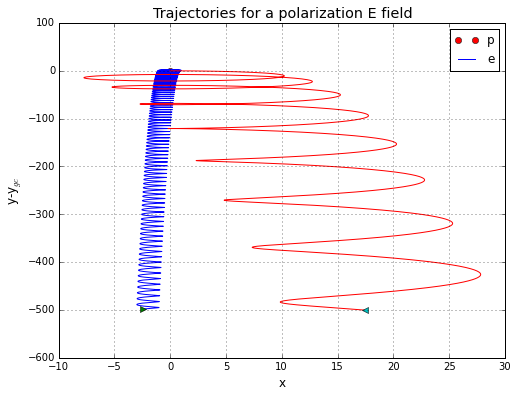

In [1]:
%matplotlib inline

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact

def Motion(Q,t,qbym,alpha):
    """Equations of movement"""
    global E0, B0    
    v = Q[3:]
    drdt = v                                   # Velocity
    dvdt = qbym*(E0*t/alpha + np.cross(v,B0))  # Acceleration
    return np.concatenate((drdt,dvdt))

def polariz(alpha=500):
    """Movement with a time dependent E field perpendicular to B"""
    global E0, B0    
    q = 1; me = 1; Mp = 10*me; Bz = 1

    r0 = np.zeros(3); v0 = np.array([1,0,0])  # Initial position and velocity
    B0 = np.array([0,0,Bz])                   # Guiding center magnetic field
    E0 = np.array([2,0,0])                    # The E field is E0*t/\alpha\vec{u}_x
    
    we = q*B0[2]/me; wp = q*B0[2]/Mp          # Cyclotron frequencies    

    tmax = 500; t = np.linspace(0,tmax,10*tmax)
  
    # Integrates the equations of movement
    Q0 = np.concatenate((r0,v0))
    Qe = odeint(Motion, Q0, t, args=(-q/me,alpha))  # electrons
    Qp = odeint(Motion, Q0, t, args=(q/Mp,alpha))   # ions

    plotPolariz(Qe,Qp)

def plotPolariz(Qe,Qp):
    r0 = np.zeros(3)
    fig = plt.figure(figsize=(8,6))
    plt.plot(r0[0],r0[1],'ro')
    plt.plot(Qe[:,0],Qe[:,1], Qe[-1,0],Qe[-1,1],'>')
    plt.plot(Qp[:,0],Qp[:,1], Qp[-1,0],Qp[-1,1],'<')
    plt.title("Trajectories for a polarization E field",fontsize="x-large")
    plt.xlabel("x",fontsize="large"); plt.ylabel("y-y$_{gc}$",fontsize="large")
    plt.grid()
    dummy = plt.legend(["p","e"])

polariz()

# Time-dependent magnetic field, $\vec{B}(t)$

From the <a href="#Ampere">Faraday law</a><a id="rF"></a> we see that a time-varying magnetic field is accompanied by a space-varying electric field.

We need to assume again small changes, i.e. that the fractional change in $\vec{B}(t)$ is small in a time interval on the order of cyclotron period. We take the magnetic field along $z$, spatially uniform and increasing. As a result of the accompanying electric field the orbit is no longer circular. It will, however, be "quasi"-circular, the azimuthal component of $\vec{E}$ small. In cylindrical coordinates and in this case, Faraday equation is
$$ \frac{1}{r}\frac{\partial}{\partial r}(r E_\theta) = -\frac{\partial B}{\partial t} $$
Integrating in $r$ (assuming B a slow function), we obtain
$$ E_\theta = -\frac{1}{2}r\frac{\partial B}{\partial t} $$
which can be written as
$$ \vec{E}_\theta = \frac{1}{2}\vec{r}\times\frac{\partial\vec{B}}{\partial t} $$
We could use these results in the Lorentz force to obtain the equations of movemente but we will use an alternative path:

Taking the scalar product of the Lorentz force equation with $v_\perp$, and integrating in one gyration period, we have the change in the kinetic energy in the period,
$$ \delta(\frac{1}{2}mv_\perp^2) = q\oint \vec{E}_\theta\cdot d\vec{r} $$
Considering the orbit (almost) close, using Stokes's theorem, we can replace the line integral by a surface integral,
$$ \delta(\frac{1}{2}mv_\perp^2) = q\int_S (\nabla\times\vec{E}_\theta)\cdot d\vec{S} = -q\int_S\frac{\partial\vec{B}}{\partial t} \cdot d\vec{S}$$
Taking account of the opposing direction of $\vec{S}$ for negative and positive charges, we have
$$ \delta(\frac{1}{2}mv_\perp^2) = |q|\frac{\partial\vec{B}}{\partial t}\pi r_L^2 $$
Using $\delta B = (\partial\vec{B})/(\partial t)(2\pi)/\omega_c$ and the definitions of $r_L$, $\omega_c$ and $\mu$ we get to the result
$$ \delta(\frac{1}{2}mv_\perp^2) = \mu\delta B $$
and, as $\delta(\frac{1}{2}mv_\perp^2) = \delta(\mu B)$, the previous result implies that $\delta\mu = 0$ !
I.e. in slowly varying magnetic fields, **the magnetic moment is invariant**.
This also implies that for the *magnetic flux*, $ B\pi r_L^2 = cte $: 

* the Larmor radius decreases as B increases.
* the magnetic flux is also an adiabatic invariant.

The conservation of $\mu$ also implies that

* the transverse kinetic energy, $W_\perp$ increases linearly com $B$.